<a href="https://colab.research.google.com/github/Kremmydasalexandros/datastories_for_emme/blob/main/%CE%93%CE%A5%CE%9D%CE%91%CE%99%CE%9A%CE%9F%CE%9A%CE%A4%CE%9F%CE%9D%CE%99%CE%91_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
#!python -m spacy download el_core_news_sm

In [71]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [72]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime


In [73]:
emolex_df = pd.read_csv("https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv")
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:

emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [76]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
import spacy

In [78]:
nlp = spacy.load('el_core_news_sm')

In [79]:
df = pd.read_csv("/content/gdrive/MyDrive/gunaikoktonia1.csv")
df

,title,text
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ..."
1,Τα διδάγματα και η προτροπή μου,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...
2,Ποινή φυλάκισης 12 μηνών αλλά εξαγοράσιμη στον...,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...
3,Το Προξενιό της Ιουλίας: Ο Προβιός στο χώμα κα...,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...
4,Εκλογές στο Ιράν: Θα αλλάξουν οι σχέσεις με τι...,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...
...,...,...
1431,Τροιζήνα: Παιδί σκοτώθηκε στο φαράγγι Διαβολογ...,Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...
1432,Το Σάββατο 29 Ιουνίου το 40ήμερο μνημόσυνο της...,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...
1433,"Φωτεινή Ντεμίρη: «Είμαι κατά του γάμου, αν ήτα...",«Είμαι σε μία μεταβατική κατάσταση και θέλω να...
1434,Φυλακές Κορυδαλλού: Η ανακοίνωση του υπουργείο...,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε..."


In [80]:
len(df)

1436

In [81]:

df.head(1)

,title,text
0,Ομιλία Κουτσούμπα στη συναυλία-αφιέρωμα στο πο...,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ..."


In [82]:
df = df[[  'text' ]]
df = df.rename(columns={'title': 'text'} )

In [83]:
df

,text
0,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ..."
1,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...
2,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...
3,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...
4,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...
...,...
1431,Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...
1432,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...
1433,«Είμαι σε μία μεταβατική κατάσταση και θέλω να...
1434,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε..."


In [84]:
df.tail()

,text
1431,Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...
1432,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...
1433,«Είμαι σε μία μεταβατική κατάσταση και θέλω να...
1434,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε..."
1435,Οι Αρχές της Ιταλίας ερευνούν την άγρια δολοφο...


In [85]:
df.dtypes

text    object
dtype: object

In [86]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [87]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [88]:
matrix = vec.fit_transform(df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
wordcount_df.shape

(1436, 13161)

In [90]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [92]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']


angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


fear_words = emolex_df[emolex_df.Fear == 1]['word']


joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [93]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']
positive_words

0                       αφεση
8                        αμην
11                  αυγουστος
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
                 ...         
13109        ζωτικης σημασιας
13132              αδιαβροχος
13137            καλωσορισατε
13145      απροσδοκητα ευρημα
13158                νεοτερος
Name: word, Length: 2352, dtype: object

In [94]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
wordcount_df[positive_words].tail(1)

,αφεση,αμην,αυγουστος,γαμηλιο ταξιδι,διευθυντρια σχολειου,δημοκρατια,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,...,αναμφιβολως,ανυπερβατος,ανηφορικος δρομος,βελουδενιος,δικαιωσε,ζωτικης σημασιας,αδιαβροχος,καλωσορισατε,απροσδοκητα ευρημα,νεοτερος
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
wordcount_df[trust_words].sum(axis=1)

0       67
1        9
2       20
3        1
4       34
        ..
1431     3
1432     4
1433     9
1434     7
1435     8
Length: 1436, dtype: int64

In [97]:
df.head(3)

,text
0,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ..."
1,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...
2,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...


In [98]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positive'] = wordcount_df[positive_words].sum(axis=1)

df['joy'] = wordcount_df[joy_words].sum(axis=1)

df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)

df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [99]:
df

,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,"Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...",82,106,39,45,28,67,49,45,100,62
1,Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...,0,17,6,0,3,9,5,0,7,2
2,Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...,28,23,2,15,5,20,10,15,35,33
3,Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...,4,5,1,3,5,1,3,5,5,5
4,Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...,14,49,7,8,8,34,16,9,27,17
...,...,...,...,...,...,...,...,...,...,...,...
1431,Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...,1,5,4,3,0,3,4,2,5,5
1432,Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...,0,5,3,0,0,4,2,1,0,0
1433,«Είμαι σε μία μεταβατική κατάσταση και θέλω να...,5,19,7,3,1,9,5,5,14,4
1434,"Ανακοίνωση για την φονική συμπλοκή, με έναν νε...",11,10,4,3,7,7,14,15,20,17


In [100]:
df['disgust' ]

0       45
1        0
2       15
3        3
4        8
        ..
1431     3
1432     0
1433     3
1434     3
1435    10
Name: disgust, Length: 1436, dtype: int64

<Axes: xlabel='fear'>

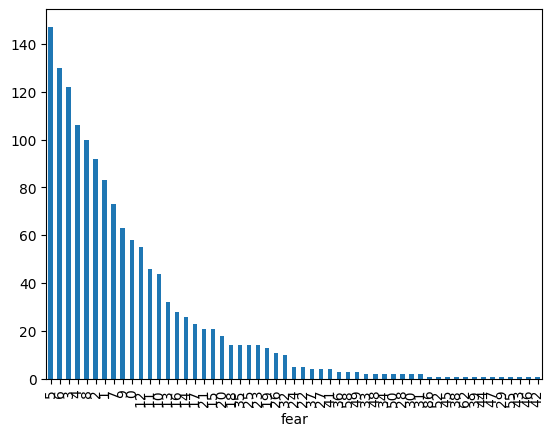

In [101]:
df['fear'].value_counts().plot(kind='bar')

In [102]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [103]:
df.columns

Index(['text', 'anger', 'positive', 'joy', 'disgust', 'surprise', 'trust',
       'anticipation', 'sadness', 'negative', 'fear'],
      dtype='object')

In [107]:
df["text"]

0       Στη Θεσσαλονίκη, στο Θέατρο Γης, στην μεγάλη σ...
1       Ι. Παλαμίδης*\nΚύριε διευθυντά\nΔιαβάζοντας όπ...
2       Με ποινή φυλάκισης 12 μηνών εξαγοράσιμη προς 1...
3       Ο Γιωργίκης Προβιός είχε το τέλος που του άξιζ...
4       Ο Μασούντ Πεζεσκιάν ελπίζει να κερδίσει ένα απ...
                              ...                        
1431    Το άτυχο\nαγόρι\nείχε πάει με γκρουπ τουριστών...
1432    Τελούμε το\nΣάββατο 29 Ιουνίου 2024\nστον Ιερό...
1433    «Είμαι σε μία μεταβατική κατάσταση και θέλω να...
1434    Ανακοίνωση για την φονική συμπλοκή, με έναν νε...
1435    Οι Αρχές της Ιταλίας ερευνούν την άγρια δολοφο...
Name: text, Length: 1436, dtype: object

In [108]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text) # το όνομα του κειμένου
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

NameError: name 'text' is not defined